In [1]:
import pandas as pd

In [28]:
df=pd.read_csv("/content/data (2).csv")

In [29]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [30]:
df['survived'].value_counts()

0    537
1    313
Name: survived, dtype: int64

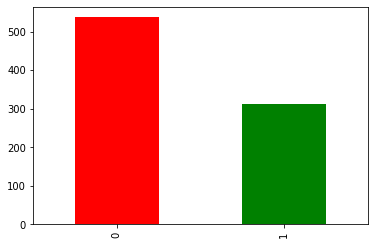

In [32]:
df['survived'].value_counts().plot(kind="bar",color=['r','g']);

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


### Checking the Nan Values

In [34]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [35]:
# Checking the shape of the data
df.shape

(850, 15)

Here We would drop Nan Values greater than 500


In [36]:
# Let's drop the columns containing nan values greater than 500
df=df.drop("cabin",axis=1)
df=df.drop("body",axis=1)
df=df.drop("boat",axis=1)
df=df.drop("home.dest",axis=1)

In [37]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
embarked          1
survived          0
dtype: int64

In [38]:
# Filling the remaining nan values with 'ffill' method
df['age'].fillna(18,inplace=True)
df['fare'].fillna(method='ffill',inplace=True)
df['embarked'].fillna(method='ffill',inplace=True)

In [39]:
df.isna().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
embarked        0
survived        0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   embarked      850 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.2+ KB


## Label Encoding
> Applying label encoding to the columns whose data type is object

In [41]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
columns=['name','sex','ticket','embarked']
df[columns]=df[columns].apply(lr.fit_transform)

In [42]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,736,0,18.0,0,0,283,7.7333,1,1
1,699,3,123,1,38.0,0,0,257,8.6625,2,0
2,1267,3,783,0,30.0,1,1,307,24.1500,2,0
3,449,2,360,0,54.0,1,3,237,23.0000,2,1
4,576,2,792,1,40.0,0,0,228,13.0000,2,0


## Splitting the Data
> Splitting it into training and testing dataset

In [47]:
x=df.drop('survived',axis=1)
y=df['survived']

In [48]:
# Splitting the dataset 2/3rd for training and 1/3rd for testing
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)

## Model Building

In [49]:
from sklearn.tree import DecisionTreeRegressor
reg1= DecisionTreeRegressor(random_state = 0)
reg1.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [55]:
model.score(test_x,test_y)

0.3808791457398265

In [51]:
model.predict([[100,101,2,1,3,4,5,6,7,8]])

array([0.34090909])

In [ ]:
Okay ,So Now Model is ready to predict values